In [101]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
# import data
TrainData = pd.read_csv("Train Data.csv", delimiter = ',', header = 0, index_col = 0)
#TrainData
#numeric_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
#categorical_features_wout_target = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]
#target = "Loan_Status"

In [103]:
# data cleaning
#print(TrainData.isnull().sum())
TrainData.drop(index=[row for row in TrainData.index 
                    if pd.isna(TrainData.loc[row, 'Married'])], inplace=True)


numeric_null_features = ["LoanAmount", "Loan_Amount_Term"]
categorical_null_features = ["Gender", #"Married", 
                             "Dependents", "Self_Employed", "Credit_History"]
#print(TrainData.isnull().sum())



# cleaning pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
cat_processor = make_pipeline(
    SimpleImputer(strategy="most_frequent", add_indicator=True), LabelEncoder()
)
num_processor = make_pipeline(
    SimpleImputer(strategy="mean", add_indicator=True), MinMaxScaler()
)

cleaning_preprocessor = make_column_transformer(
    (num_processor, num_selector), (cat_processor, cat_selector)
)
cleaning_preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D98561F40>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent')),
                                                 ('labelencoder',
                                                  LabelEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D90769EE0>)])

In [104]:
# outlier detection

# An approach that can be used for both multivariate and univariate analysis is Isolation Forest. 
# This approach splits the data and isolates the samples in the form of a tree.
# The number of splittings required to isolate an outlier is lower than normal data.
# This is a type of unsupervised anomaly detection

from sklearn.ensemble import IsolationForest

cleaning_pipeline = make_pipeline(cleaning_preprocessor, IsolationForest(contamination=float(0.05), random_state=42) )
cleaning_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D98561F40>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent')),
                                                                  ('labelencoder',
                                                                   LabelEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D90769EE0>)])),
                ('isolationforest',
                 IsolationForest(contamination=0.05, random_state=42))])

In [105]:
# split data into features and targets, train and test
from sklearn.model_selection import train_test_split
#print(TrainData.shape)

X= TrainData.iloc[:, 0:11]
y= TrainData.iloc[:, 11]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("X: ", X)
#print("y: ", y)


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [107]:
lr_pipeline = make_pipeline(
    cleaning_pipeline, LinearRegression()
)
lr_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True)),
                                                                                   ('minmaxscaler',
                                                                                    MinMaxScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D98561F40>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  strategy='most_frequent')),
                                                                                   ('labelencoder',
                                                                                    LabelEncoder())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D90769EE0>)])),
                                 ('isolationforest',
                                  IsolationForest(contamination=0.05,
                                                  random_state=42))])),
                ('linearregression', LinearRegression())])

In [108]:
dt_pipeline = make_pipeline(
    cleaning_pipeline, DecisionTreeClassifier(criterion="entropy")
)
dt_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True)),
                                                                                   ('minmaxscaler',
                                                                                    MinMaxScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D98561F40>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  strategy='most_frequent')),
                                                                                   ('labelencoder',
                                                                                    LabelEncoder())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D90769EE0>)])),
                                 ('isolationforest',
                                  IsolationForest(contamination=0.05,
                                                  random_state=42))])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

In [109]:
knn3_pipeline = make_pipeline(
    cleaning_pipeline, KNeighborsClassifier(n_neighbors=3)
)
knn3_pipeline


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True)),
                                                                                   ('minmaxscaler',
                                                                                    MinMaxScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D98561F40>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  strategy='most_frequent')),
                                                                                   ('labelencoder',
                                                                                    LabelEncoder())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D90769EE0>)])),
                                 ('isolationforest',
                                  IsolationForest(contamination=0.05,
                                                  random_state=42))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [110]:
knn5_pipeline = make_pipeline(
    cleaning_pipeline, KNeighborsClassifier(n_neighbors=5)
)
knn5_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True)),
                                                                                   ('minmaxscaler',
                                                                                    MinMaxScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D98561F40>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  strategy='most_frequent')),
                                                                                   ('labelencoder',
                                                                                    LabelEncoder())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D90769EE0>)])),
                                 ('isolationforest',
                                  IsolationForest(contamination=0.05,
                                                  random_state=42))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [111]:
knn10_pipeline = make_pipeline(
    cleaning_pipeline, KNeighborsClassifier(n_neighbors=10)
)
knn10_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True)),
                                                                                   ('minmaxscaler',
                                                                                    MinMaxScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D98561F40>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  strategy='most_frequent')),
                                                                                   ('labelencoder',
                                                                                    LabelEncoder())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D90769EE0>)])),
                                 ('isolationforest',
                                  IsolationForest(contamination=0.05,
                                                  random_state=42))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [112]:
nb_pipeline = make_pipeline(
    cleaning_pipeline, GaussianNB()
)
nb_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True)),
                                                                                   ('minmaxscaler',
                                                                                    MinMaxScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D98561F40>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=True,
                                                                                                  strategy='most_frequent')),
                                                                                   ('labelencoder',
                                                                                    LabelEncoder())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D90769EE0>)])),
                                 ('isolationforest',
                                  IsolationForest(contamination=0.05,
                                                  random_state=42))])),
                ('gaussiannb', GaussianNB())])

In [113]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ("Linear Regression", lr_pipeline),
    ("Decision Tree", dt_pipeline),
    ("KNN n =3", knn3_pipeline),
    ("KNN n=5", knn5_pipeline),
    ("KNN n=10", knn10_pipeline),
    ("Naive Bayes", nb_pipeline),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor

StackingRegressor(estimators=[('Linear Regression',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                                  ('minmaxscaler',
                                                                                                                   MinMaxScaler())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D98561F40>),
                                                                                                 (...
                                                                                                 ('pipeline-2',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   SimpleImputer(add_indicator=True,
                                                                                                                                 strategy='most_frequent')),
                                                                                                                  ('labelencoder',
                                                                                                                   LabelEncoder())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D90769EE0>)])),
                                                                ('isolationforest',
                                                                 IsolationForest(contamination=0.05,
                                                                                 random_state=42))])),
                                               ('gaussiannb', GaussianNB())]))],
                  final_estimator=RidgeCV())

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
pipe.score(X_test, y_test)

In [121]:
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, average_precision_score, log_loss
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scoring = ["accuracy", "neg_log_loss", "average_precision"]
#scores = cross_validate(cleaning_pipeline, X, y, scoring=scoring, cv=cv)
cleaning_pipeline.fit(X_train, y_train)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

TypeError: 'builtin_function_or_method' object is not iterable

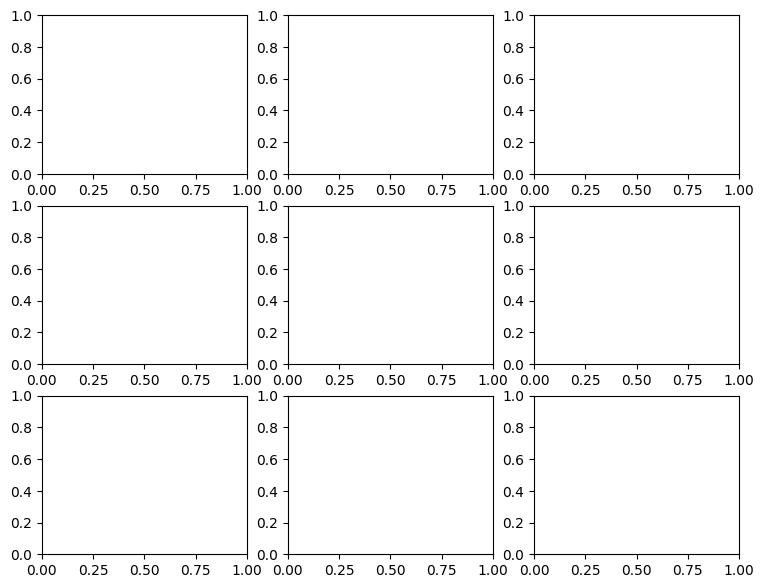

In [84]:
# measure and plot the evaluation results
import time
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_validate, cross_val_predict

fig, axs = plt.subplots(3, 3, figsize=(9, 7))
axs = np.ravel(axs)
for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    scorers = {"R2": "r2", "MAE": "neg_mean_absolute_error"}
    scores = cross_validate(
        est, X, y, scoring=list(scorers.values), n_jobs=-1, verbose=0
    )

    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)
    scores = {
        key: (
            f"{np.abs(np.mean(scores[f'test_{value}'])):.2f} +- "
            f"{np.std(scores[f'test_{value}']):.2f}"
        )
        for key, value in scorers.items()
    }
    for name, score in scores.items():
        ax.plot([], [], " ", label=f"{name}: {score}")
    ax.legend(loc="upper left")



# fig, axs = plt.subplots(3, 3, figsize=(9, 7))
# axs = np.ravel(axs)

# for ax, (name, est) in zip(
#     axs, estimators + [("Stacking Regressor", stacking_regressor)]
# ):
#     scorers = {"R2": "r2", "MAE": "neg_mean_absolute_error"}

#     start_time = time.time()
#     scores = cross_validate(
#         est, X, y, scoring=list(scorers.values()), n_jobs=-1, verbose=0
#     )
#     elapsed_time = time.time() - start_time

#     y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)
#     scores = {
#         key: (
#             f"{np.abs(np.mean(scores[f'test_{value}'])):.2f} +- "
#             f"{np.std(scores[f'test_{value}']):.2f}"
#         )
#         for key, value in scorers.items()
#     }

#     display = PredictionErrorDisplay.from_predictions(
#         y_true=y,
#         y_pred=y_pred,
#         kind="actual_vs_predicted",
#         ax=ax,
#         scatter_kwargs={"alpha": 0.2, "color": "tab:blue"},
#         line_kwargs={"color": "tab:red"},
#     )
#     ax.set_title(f"{name}\nEvaluation in {elapsed_time:.2f} seconds")

#     for name, score in scores.items():
#         ax.plot([], [], " ", label=f"{name}: {score}")
#     ax.legend(loc="upper left")

# plt.suptitle("Single predictors versus stacked predictors")
# plt.tight_layout()
# plt.subplots_adjust(top=0.9)
# plt.show()

# Some other things

In [ ]:
# model selection
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression

class ClfSwitcher(BaseEstimator):

    def __init__(self, estimator = LinearRegression()):
            self.estimator = estimator
            
    def fit(self, X, y=None, **kwargs):
            self.estimator.fit(X, y)
            return self
            
    def predict(self, X, y=None):
            return self.estimator.predict(X)
            
    def predict_proba(self, X):
            return self.estimator.predict_proba(X)
            
    def score(self, X, y):
            return self.estimator.score(X, y)

In [ ]:
clf_pipeline = make_pipeline(
    cleaning_pipeline,
    ClfSwitcher()
)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

grid_params = [
    {'model__estimator': [LinearRegression()]},
    {'model__estimator': [DecisionTreeClassifier(criterion='entropy')]},
    {'model__estimator': [KNeighborsClassifier(n_neighbors=3)]},
    {'model__estimator': [KNeighborsClassifier(n_neighbors=5)]},
    {'model__estimator': [KNeighborsClassifier(n_neighbors=10)]},
    {'model__estimator': [GaussianNB()]}

]

gs = GridSearchCV(estimator=clf_pipeline, param_grid=grid_params, scoring='accuracy')
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))

In [ ]:
cleaning_pipeline.fit(X, y)

In [ ]:
# prepare models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('K Nearest Neighbor', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))

In [ ]:
# evaluate each model in turn
import matplotlib.pyplot as plt
from sklearn import model_selection

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Data Cleaning Pipeline
# 1) Imputing missing values (mean, median, most_frequent, knn, dropna)
# 2) Normalizing numerical features (optional, depends on model) (minmaxscaler, standardscaler, robustscaler)
# 2) Encoding categorical features (optional, depends on model) (labelencoder, one-hotencoder)
# 3) Remove outliers (IQR, Z-score, Multilinear Regression, IsolationForest)

# 5) Train a machine learning model
# 6) Evaluate and optimise the model
# 7) Clean new data (steps 1-4)
# 8) Fit the model on new data

In [ ]:
# Using conclusions from data visualization section, decide for each feature how to fill the missing values.

# Gender: most_frequent (male), since there is a huge variance between the two.
# Married: we can drop the 3 tuples, knowing, their effect over 614 tuples is not significant anyway.
# Dependents: median
# Self_Employed: most_frequent
# Credit_History: most_frequent
# LoanAmount: (normally distributed variable, since mean=342, median=360, mode=360) impute with mean
# Loan_Amount_Term: impute with median

# Note: In regards to imputing missing data: "Mean is most useful when the original data is not skewed, 
# while the median is more robust, not sensitive to outliers, and thus used when data is skewed."

# next steps: use RobustScaler on numerical + LabelEncoder on[], OneHotEncoder on[] 

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_pipeline =  Pipeline([
                ('mode_impute', SimpleImputer(strategy="most_frequent")),
                ('encoder', LabelEncoder())
            ]) 
num_pipeline =  Pipeline([
                ('mode_impute', SimpleImputer(strategy="mean")),
                ('scaler', MinMaxScaler())
            ])   

In [ ]:
from sklearn.model_selection import train_test_split

X= TrainData.iloc[:, :-1].values
y= TrainData.iloc[:, -1] .values
# train test split: 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
#print("X: ", X)
#print("y: ", y)

In [ ]:
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,numeric_features),
    ('cat_pipeline',cat_pipeline,categorical_features_wout_target)
    ],
    remainder='drop',
    n_jobs=-1)

In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clf)
])

In [ ]:
from sklearn import set_config

set_config(display='diagram')
display(clf_pipeline)

In [ ]:
clf_pipeline.fit(X_train, y_train)
# preds = clf_pipeline.predict(X_test)
score = clf_pipeline.score(X_test, y_test)
print(f"Model score: {score}") # model accuracy

In [ ]:
from sklearn.pipeline import FeatureUnion

feats = FeatureUnion([('Gender', cat_pipeline), 
                      ('Married', cat_pipeline),
                      ('Dependents', cat_pipeline),
                      ('Education', cat_pipeline),
                      ('Self_Employed', cat_pipeline),
                      ('ApplicantIncome', num_pipeline),
                      ('CoapplicantIncome', num_pipeline), 
                      ('LoanAmount', num_pipeline),
                      ('Loan_Amount_Term', num_pipeline),
                      ('Credit_History', cat_pipeline),
                      ('Property_Area', cat_pipeline),
                      ('Loan_Status', cat_pipeline)
                      
                      ])

#feature_processing = Pipeline([('feats', feats)])
#feature_processing.fit_transform(X_train, y_train)





from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB





pipeline = Pipeline([
    ('features',feats),
    ('classifier', DecisionTreeClassifier()),
])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)
np.mean(preds == y_test)


# Something else

In [ ]:
clean_col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',mean_num_pipeline,numeric_features),
    ('cat_pipeline',mode_cat_pipeline,categorical_features_wout_target)
    ],
    #remainder='passthrough',
    #remainder='drop', # the specified columns in transformers are transformed and combined in the output, and the non-specified columns are dropped.
    #n_jobs=-1
    ) # Number of jobs to run in parallel. -1 -> all processors


In [ ]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

clf = DecisionTreeClassifier()
clf_pipeline = Pipeline(steps=[
    ('col_trans', clean_col_trans),
    ('model', clf)
])

In [ ]:
from sklearn import set_config

set_config(display='diagram')
display(clf_pipeline)

In [ ]:
clf_pipeline.fit(X_train, y_train)
# preds = clf_pipeline.predict(X_test)
score = clf_pipeline.score(X_test, y_test)
print("Model score: ", score) # model accuracy

In [ ]:


class ClfSwitcher(BaseEstimator):

    def __init__(self, estimator = DecisionTreeClassifier()):
            self.estimator = estimator
            
    def fit(self, X, y=None, **kwargs):
            self.estimator.fit(X, y)
            return self
            
    def predict(self, X, y=None):
            return self.estimator.predict(X)
            
    def predict_proba(self, X):
            return self.estimator.predict_proba(X)
            
    def score(self, X, y):
            return self.estimator.score(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X = TrainData["Gender", "Married", "Dependents",
"Education"             ,
"Self_Employed"        ,
"ApplicantIncome"       ,
"CoapplicantIncome"     ,
"LoanAmount"           ,
"Loan_Amount_Term"     ,
"Credit_History"       ,
"Property_Area"]
y = TrainData['Loan_Status']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) #stratification. 70/30 split

In [ ]:
clf_pipeline = Pipeline(steps=[
    ('clean_col_trans', clean_col_trans),
    ('model', ClfSwitcher())  # class to switch between models
])


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

grid_params = [
    {'model__estimator': [DecisionTreeClassifier(criterion="entropy")]},
    {'model__estimator': [KNeighborsClassifier()]},
    {'model__estimator': [GaussianNB()]}
]

gs = GridSearchCV(clf_pipeline, grid_params, scoring='accuracy')
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(linear_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
gs.fit(X_train, y_train)

print("Best Score of train set: "+str(gs.best_score_))
print("Best parameter set: "+str(gs.best_params_))
print("Test Score: "+str(gs.score(X_test,y_test)))